In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# to handle getting zip files
# from zipfile import ZipFile
# from urllib import urlopen
# import os

In [2]:
basePath = "~/Downloads/citibike/"
df = pd.DataFrame()
# for m in range(1,13):
for m in range(7,9):
#     if m > 1:
#         continue
    ms = str(m)
    if m < 10:
        ms = "0" + ms
    fname =  "2017%s-citibike-tripdata.csv.zip"%ms
    p = basePath + fname
    dfTemp = pd.read_csv(p)
    df = pd.concat([df,dfTemp],ignore_index=True)
#     url = urlopen(URL)
#     output = open(fname, 'wb')    # note the flag:  "wb"        
#     output.write(url.read())
#     output.close()
#     dfTemp = pd.read_csv(fname)
#     df = pd.concat([df,dfTemp])
#     os.remove(fname)

# baseURL = "https://s3.amazonaws.com/tripdata/"
# df = pd.DataFrame()
# for m in range(1,13):
# #     if m > 1:
# #         continue
#     ms = str(m)
#     if m < 10:
#         ms = "0" + ms
#     fname =  "2017%s-citibike-tripdata.csv.zip"%ms
#     URL = baseURL + fname
#     url = urlopen(URL)
#     output = open(fname, 'wb')    # note the flag:  "wb"        
#     output.write(url.read())
#     output.close()
#     dfTemp = pd.read_csv(fname)
#     df = pd.concat([df,dfTemp])
#     os.remove(fname)

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [4]:
df.shape

(3552097, 15)

In [5]:
#anything to clean?
df.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 453312
gender                          0
dtype: int64

In [6]:
# only missing data is birth year. For right now, forget about it.
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.552097e+06,3.552097e+06,3.552097e+06,3.552097e+06,3.552097e+06,3.552097e+06,3.552097e+06,3.552097e+06,3.098785e+06,3.552097e+06
mean,1.109566e+03,1.359812e+03,4.073577e+01,-7.398516e+01,1.357237e+03,4.073548e+01,-7.398525e+01,2.340829e+04,1.979678e+03,1.100253e+00
std,1.503625e+04,1.344612e+03,2.893471e-02,1.737942e-02,1.344308e+03,3.606559e-02,4.294828e-02,5.049559e+03,1.154712e+01,5.944012e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,0.000000e+00,-7.406692e+01,1.452900e+04,1.874000e+03,0.000000e+00
25%,3.950000e+02,3.590000e+02,4.071745e+01,-7.399725e+01,3.590000e+02,4.071745e+01,-7.399726e+01,1.855200e+04,1.972000e+03,1.000000e+00
50%,6.730000e+02,4.850000e+02,4.073650e+01,-7.398765e+01,4.840000e+02,4.073625e+01,-7.398776e+01,2.536400e+04,1.983000e+03,1.000000e+00
75%,1.177000e+03,3.141000e+03,4.075514e+01,-7.397605e+01,3.140000e+03,4.075510e+01,-7.397606e+01,2.790700e+04,1.989000e+03,1.000000e+00
max,4.509256e+06,3.489000e+03,4.550636e+01,-7.356946e+01,3.489000e+03,4.550636e+01,0.000000e+00,3.082700e+04,2.001000e+03,2.000000e+00


In [7]:
# well, it looks like there are at least some entries with 0 latitude and longitude!  Why don't we get rid of those..
# notWeirdStation = ((df["start station latitude"] != 0.) | (df["start station longitude"] != 0.) 
# | (df["end station latitude"] != 0.) | (df["end station longitude"] != 0.))
# df = df[notWeirdStation].copy()
# df.describe()
# notWeirdStation
df = df[(df["start station latitude"] != 0.) & (df["start station longitude"] != 0.) & (df["end station latitude"] != 0.) & (df["end station longitude"] != 0.) ].copy()
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.552096e+06,3.552096e+06,3.552096e+06,3.552096e+06,3.552096e+06,3.552096e+06,3.552096e+06,3.552096e+06,3.098784e+06,3.552096e+06
mean,1.109566e+03,1.359811e+03,4.073577e+01,-7.398516e+01,1.357237e+03,4.073549e+01,-7.398527e+01,2.340828e+04,1.979678e+03,1.100253e+00
std,1.503625e+04,1.344612e+03,2.893470e-02,1.737941e-02,1.344308e+03,2.887165e-02,1.742251e-02,5.049559e+03,1.154712e+01,5.944012e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406692e+01,1.452900e+04,1.874000e+03,0.000000e+00
25%,3.950000e+02,3.590000e+02,4.071745e+01,-7.399725e+01,3.590000e+02,4.071745e+01,-7.399726e+01,1.855200e+04,1.972000e+03,1.000000e+00
50%,6.730000e+02,4.850000e+02,4.073650e+01,-7.398765e+01,4.840000e+02,4.073625e+01,-7.398776e+01,2.536400e+04,1.983000e+03,1.000000e+00
75%,1.177000e+03,3.141000e+03,4.075514e+01,-7.397605e+01,3.140000e+03,4.075510e+01,-7.397606e+01,2.790700e+04,1.989000e+03,1.000000e+00
max,4.509256e+06,3.489000e+03,4.550636e+01,-7.356946e+01,3.489000e+03,4.550636e+01,-7.356946e+01,3.082700e+04,2.001000e+03,2.000000e+00


In [8]:
df.shape

(3552096, 15)

In [9]:
radEarth = 3958.7608367 #avg rad in miles

def crowDist(lat1,lon1,id1,lat2,lon2,id2):
    if id1 == id2:
        return 0.
    
    # convert to radians
    lat1 *= np.pi/180.
    lon1 *= np.pi/180.
    lat2 *= np.pi/180.
    lon2 *= np.pi/180.
    
    angle = np.arccos( np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1) )
    return radEarth*angle
    
def crowDistRow(row):
    lat1 = row["start station latitude"]
    lat2 = row["end station latitude"]
    lon1 = row["start station longitude"]
    lon2 = row["end station longitude"]
    id1 = row["start station id"]
    id2 = row["end station id"]
    
    return crowDist(lat1,lon1,id1,lat2,lon2,id2)    

In [10]:
df["crowDist"] = df.apply(crowDistRow,axis=1)

Text(0.5,0,'Ride Distance (mi)')

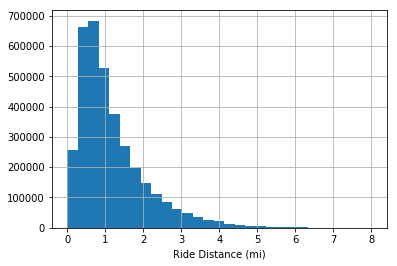

In [28]:
df["crowDist"].hist(bins=np.linspace(0.,8.,30))
plt.xlabel("Ride Distance (mi)")

In [12]:
# make a matrix with distances between all stations
means=df.groupby("start station id").mean()
stations = np.sort(df["start station id"].unique())
stationDf = means[["start station latitude","start station longitude"]]

distMatrix = np.zeros((len(stations),len(stations)))
for i,istat in enumerate(stations):
    lati = stationDf.loc[istat]["start station latitude"]
    loni = stationDf.loc[istat]["start station longitude"]
    for j,jstat in enumerate(stations):
        latj = stationDf.loc[jstat]["start station latitude"]
        lonj = stationDf.loc[jstat]["start station longitude"]
        distMatrix[i,j] = crowDist(lati,loni,istat,latj,lonj,jstat)
        
distMatrix = pd.DataFrame(distMatrix,index=stations,columns=stations)
distMatrix

,72,79,82,83,116,119,120,127,128,143,...,3470,3472,3474,3476,3477,3478,3479,3485,3488,3489
72,0.000000,3.393462,3.889729,5.838811,1.805604,4.988169,5.850682,2.546080,2.815521,5.173597,...,6.734744,1.836405,2.951676,3.651547,7.778965,7.652168,5.909481,3.075308,328.137209,3.941028
79,3.393462,0.000000,0.645743,2.910566,1.588912,2.186344,3.340005,0.871192,0.584802,1.973034,...,3.462509,1.633798,0.444697,2.964463,4.407227,4.286973,2.544293,1.724820,331.500062,0.604055
82,3.889729,0.645743,0.000000,2.265032,2.115538,1.558875,2.725827,1.461074,1.110311,1.345328,...,2.871804,2.215248,0.994746,2.777841,3.892437,3.763623,2.231614,1.647807,332.026064,0.179824
83,5.838811,2.910566,2.265032,0.000000,4.215442,0.852046,0.915716,3.673035,3.299839,1.071922,...,1.373664,4.386198,3.211529,3.192864,2.662616,2.508385,2.570456,2.860448,333.835957,2.341081
116,1.805604,1.588912,2.115538,4.215442,0.000000,3.387348,4.396962,0.746860,1.016769,3.438289,...,4.984910,0.320055,1.149680,2.878391,5.987164,5.863497,4.108728,1.809785,329.920308,2.149818
119,4.988169,2.186344,1.558875,0.852046,3.387348,0.000000,1.174714,2.884940,2.509438,0.843423,...,2.019968,3.573818,2.434682,2.499803,3.289525,3.137494,2.592178,2.019358,332.995443,1.674552
120,5.850682,3.340005,2.725827,0.915716,4.396962,1.174714,0.000000,3.978423,3.605949,1.828193,...,2.204180,4.618781,3.547863,2.731673,3.455093,3.303386,3.463553,2.776383,333.581363,2.847716
127,2.546080,0.871192,1.461074,3.673035,0.746860,2.884940,3.978423,0.000000,0.375509,2.806098,...,4.323141,0.763025,0.467570,2.961104,5.277443,5.157849,3.363950,1.735977,330.630928,1.462293
128,2.815521,0.584802,1.110311,3.299839,1.016769,2.509438,3.605949,0.375509,0.000000,2.450118,...,3.981580,1.106795,0.141100,2.736452,4.970405,4.846809,3.128303,1.484831,330.936999,1.133708
143,5.173597,1.973034,1.345328,1.071922,3.438289,0.843423,1.828193,2.806098,2.450118,0.000000,...,1.563079,3.556888,2.339122,3.210136,2.711234,2.568187,1.748831,2.468739,333.298924,1.372206


In [13]:
# uch, more stations to drop...
distMatrix.describe()

,72,79,82,83,116,119,120,127,128,143,...,3470,3472,3474,3476,3477,3478,3479,3485,3488,3489
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,4.032026,3.340881,3.294643,3.992011,3.342548,3.498783,4.053144,3.342758,3.224297,3.702828,...,4.810841,3.515292,3.251065,3.398746,5.926176,5.787713,4.773037,2.993951,330.321527,3.373433
std,13.067043,13.175680,13.209296,13.333689,13.110287,13.274644,13.297613,13.132357,13.149766,13.298684,...,13.385141,13.101190,13.155207,13.118990,13.389838,13.390442,13.286800,13.144548,13.423312,13.210442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.943542,1.717225,1.689740,1.795294,1.649567,1.657140,1.926965,1.625110,1.516118,1.633842,...,2.458235,1.834022,1.566512,2.184134,3.525780,3.390256,2.623900,1.565572,328.932118,1.774526
50%,3.212765,2.848546,2.587614,3.018447,2.870675,2.356862,3.223408,2.913264,2.757143,2.751077,...,4.042362,3.074169,2.798292,2.908691,5.185052,5.037322,4.057748,2.321688,331.061490,2.695266
75%,5.190591,3.635452,3.588992,4.998803,3.995878,4.166925,4.924215,3.839982,3.678167,4.523998,...,6.028231,4.150722,3.658509,3.611502,7.207892,7.060126,5.518995,3.317298,333.000564,3.682425
max,328.137209,331.500062,332.026064,333.835957,329.920308,332.995443,333.581363,330.630928,330.936999,333.298924,...,334.861917,329.872885,331.068176,330.865676,335.906672,335.783802,333.907252,330.976794,335.906672,332.069925


In [14]:
distMatrix.loc[72].idxmax()

3488

In [15]:
df[df["start station id"] == 3488]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,crowDist
2993392,159,2017-08-22 14:49:07,2017-08-22 14:51:47,3488,8D QC Station 01,45.506364,-73.569463,3488,8D QC Station 01,45.506364,-73.569463,21928,Subscriber,1989.0,1,0.0
2993691,625,2017-08-22 14:56:04,2017-08-22 15:06:30,3488,8D QC Station 01,45.506364,-73.569463,3488,8D QC Station 01,45.506364,-73.569463,21928,Subscriber,1989.0,1,0.0
2994406,1641,2017-08-22 15:12:58,2017-08-22 15:40:19,3488,8D QC Station 01,45.506364,-73.569463,3488,8D QC Station 01,45.506364,-73.569463,21928,Customer,NaN,0,0.0
3109483,80,2017-08-24 10:31:42,2017-08-24 10:33:02,3488,8D QC Station 01,45.506364,-73.569463,3488,8D QC Station 01,45.506364,-73.569463,21928,Subscriber,1989.0,1,0.0
3109670,309,2017-08-24 10:35:53,2017-08-24 10:41:02,3488,8D QC Station 01,45.506364,-73.569463,3488,8D QC Station 01,45.506364,-73.569463,21928,Customer,NaN,0,0.0


In [16]:
df.drop(3488,inplace=True)
distMatrix.drop(3488,inplace=True)
distMatrix.drop(3488,axis=1,inplace=True)

In [17]:
distMatrix.describe()

,72,79,82,83,116,119,120,127,128,143,...,3469,3470,3472,3474,3476,3477,3478,3479,3485,3489
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,...,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,3.516756,2.819165,2.772017,3.467617,2.823347,2.974941,3.529251,2.822427,2.703291,3.178827,...,2.689125,4.286118,2.996441,2.729893,2.878131,5.401565,5.263077,4.249771,2.472516,2.850863
std,1.867026,1.457376,1.553316,2.133366,1.433060,1.828353,1.980155,1.375824,1.381192,1.969307,...,1.155372,2.389602,1.429721,1.393516,1.163944,2.431141,2.431098,2.011710,1.219740,1.574717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.941597,1.717000,1.688537,1.785968,1.644299,1.656521,1.925362,1.624713,1.514792,1.633768,...,1.807323,2.452892,1.833228,1.565871,2.182147,3.516219,3.384755,2.623263,1.563438,1.773134
50%,3.205476,2.846251,2.582830,3.016835,2.863763,2.355081,3.221454,2.913171,2.748703,2.742468,...,2.606678,4.042334,3.062042,2.798242,2.908505,5.177088,5.032150,4.053279,2.320855,2.694481
75%,5.188962,3.629738,3.588617,4.971335,3.983160,4.135030,4.923912,3.837280,3.672794,4.508599,...,3.463009,5.999475,4.149151,3.658157,3.605959,7.198231,7.049797,5.517871,3.315936,3.677211
max,9.357039,12.574778,12.918929,14.242320,11.068813,13.462373,13.809641,11.808704,11.995775,13.975163,...,10.821877,15.467164,11.169151,12.136759,11.087513,16.685364,16.540408,15.112319,11.508438,13.023553


Text(0.5,0,'Distance (mi)')

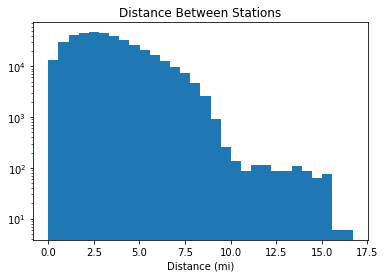

In [27]:
# want to define for each station a "start stress" and "end stress" factor
toplot = []
for col in distMatrix.columns:
    vals = distMatrix[col].tolist()
    for val in vals:
        toplot.append(val)
plt.hist(toplot, bins=30, log=True)
plt.title("Distance Between Stations")
plt.xlabel("Distance (mi)")

In [31]:
def get_date_string(dt):
    return "%i-%i"%(dt.month, dt.day)

df["monthDay"] = df["starttime"].apply(lambda x : get_date_string(pd.to_datetime(x)))
df["monthDay"].value_counts()

7-26    70323
8-16    68436
8-9     67884
8-1     66677
8-17    66656
8-24    66307
8-10    66249
7-18    66234
8-3     66149
7-27    65769
7-25    65336
8-30    65329
8-8     65233
8-23    65070
8-31    64881
7-31    64218
8-25    64217
7-19    63915
7-28    63899
8-11    63140
7-17    62555
8-19    62442
7-6     62147
7-12    61786
7-11    61671
8-14    61482
8-21    61059
7-10    60907
8-28    60886
8-22    60541
        ...  
7-21    60072
7-20    59663
7-30    59342
8-5     58971
8-13    57518
7-9     57118
7-16    56833
7-15    56499
8-6     56476
7-13    56475
8-4     56394
8-2     56183
8-20    55442
7-8     55015
8-27    54598
7-29    52947
8-15    52461
8-26    50109
7-4     49924
7-3     48193
7-22    48011
7-23    46942
7-7     44068
7-24    43792
7-2     43036
7-1     36736
8-18    36620
8-29    35152
7-14    31851
8-7     23395
Name: monthDay, Length: 62, dtype: int64

In [34]:
df["numRides"]=1
df_grouped = df.groupby("monthDay").sum()

Text(0.5,0,'Number of Rides Per Station')

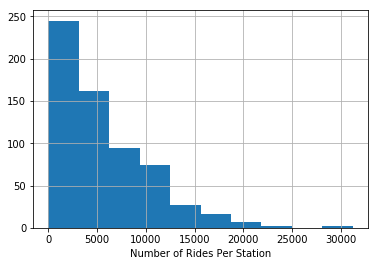

In [46]:
dates = df["monthDay"].unique().tolist()
df.groupby("start station id").sum()["numRides"].hist()
plt.xlabel("Number of Rides Per Station")

Text(0.5,0,'Number of Rides Per Station')

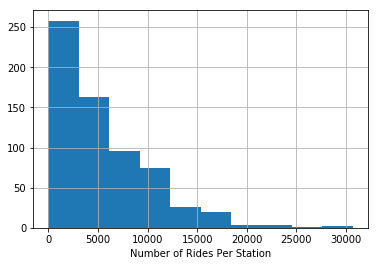

In [48]:
df.groupby("end station id").sum()["numRides"].hist()
plt.xlabel("Number of Rides Per Station")